In [1]:
from __future__ import print_function, division

from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import RMSprop

from PIL import Image

import keras.backend as K

import matplotlib.pyplot as plt

import sys

import numpy as np
import pandas as pd
import numpy as np
import random as rnd
import pprint
from itertools import cycle, islice
import numpy as np

from scipy.stats import multivariate_normal

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
#from sklearn.utils.fixes import signature

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


import matplotlib.pyplot as plt
%matplotlib inline

#import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import numpy as np
import PIL
from skimage import io
from skimage.feature.texture import local_binary_pattern
from skimage.feature.texture import greycomatrix
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte, img_as_float
from skimage import exposure
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import keras
from keras.layers import Input,AveragePooling2D, Dense, concatenate,Conv2DTranspose, Conv2D, BatchNormalization, GlobalAveragePooling2D,Activation, MaxPooling2D, Dropout, GlobalMaxPool2D
from keras.models import Model
from matplotlib import pyplot as plt
from scipy.ndimage import rotate as rot
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Add
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from pathlib import Path
from keras.layers.pooling import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D

import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [2]:
reader = pd.read_csv('D:\\Users\\dell\\Desktop\\Unicoverge Technologies\\airqualitytrendsbycity1990-2018.csv', engine = "python")
print(reader.describe())

               CBSA  Number of Trend Sites        1990        1991  \
count    900.000000             900.000000  470.000000  470.000000   
mean   30829.566667               1.860000   40.597602   40.560196   
std    11586.874797               1.713118   60.352092   60.879666   
min    10100.000000               1.000000    0.000000    0.041000   
25%    19860.000000               1.000000    0.087000    0.088250   
50%    32075.000000               1.000000    9.500000    8.300000   
75%    40710.000000               2.000000   69.875000   67.000000   
max    49700.000000              13.000000  363.000000  338.000000   

             1992        1993        1994        1995        1996        1997  \
count  470.000000  470.000000  470.000000  470.000000  470.000000  470.000000   
mean    37.756238   36.145413   35.464789   31.565030   30.007794   30.094351   
std     57.184969   52.649818   50.713108   43.492277   42.583897   42.474556   
min      0.040000    0.040000    0.040000    

In [3]:
print(reader)

      CBSA Core Based Statistical Area Pollutant       Trend Statistic  \
0    10100                Aberdeen, SD     PM2.5  Weighted Annual Mean   
1    10100                         NaN     PM2.5       98th Percentile   
2    10420                   Akron, OH        CO               2nd Max   
3    10420                         NaN        O3               4th Max   
4    10420                         NaN     PM2.5  Weighted Annual Mean   
..     ...                         ...       ...                   ...   
895  49700               Yuba City, CA       NO2           Annual Mean   
896  49700                         NaN       NO2       98th Percentile   
897  49700                         NaN        O3               4th Max   
898  49700                         NaN     PM2.5  Weighted Annual Mean   
899  49700                         NaN     PM2.5       98th Percentile   

     Number of Trend Sites    1990    1991    1992    1993    1994  ...  \
0                        1     NaN  

In [4]:
reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 34 columns):
CBSA                           900 non-null int64
Core Based Statistical Area    283 non-null object
Pollutant                      900 non-null object
Trend Statistic                900 non-null object
Number of Trend Sites          900 non-null int64
1990                           470 non-null float64
1991                           470 non-null float64
1992                           470 non-null float64
1993                           470 non-null float64
1994                           470 non-null float64
1995                           470 non-null float64
1996                           470 non-null float64
1997                           470 non-null float64
1998                           470 non-null float64
1999                           470 non-null float64
2000                           900 non-null float64
2001                           900 non-null float64
2002              

In [5]:
reader.head()

,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trend Sites,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,10100,"Aberdeen, SD",PM2.5,Weighted Annual Mean,1,NaN,NaN,NaN,NaN,NaN,...,8.100,8.700,7.100,7.500,7.300,6.20,6.200,5.40,5.800,6.600
1,10100,NaN,PM2.5,98th Percentile,1,NaN,NaN,NaN,NaN,NaN,...,23.000,27.000,18.000,23.000,22.000,17.00,14.000,14.00,13.000,22.000
2,10420,"Akron, OH",CO,2nd Max,1,5.70,3.300,4.100,3.100,5.300,...,1.800,1.400,1.000,1.100,0.800,0.80,1.000,1.10,0.900,1.800
3,10420,NaN,O3,4th Max,2,0.09,0.101,0.087,0.093,0.086,...,0.067,0.074,0.073,0.072,0.059,0.06,0.065,0.06,0.066,0.068
4,10420,NaN,PM2.5,Weighted Annual Mean,3,NaN,NaN,NaN,NaN,NaN,...,11.700,12.400,11.100,10.000,9.700,9.90,10.400,8.20,7.900,7.900


In [6]:
print(reader.shape)

(900, 34)


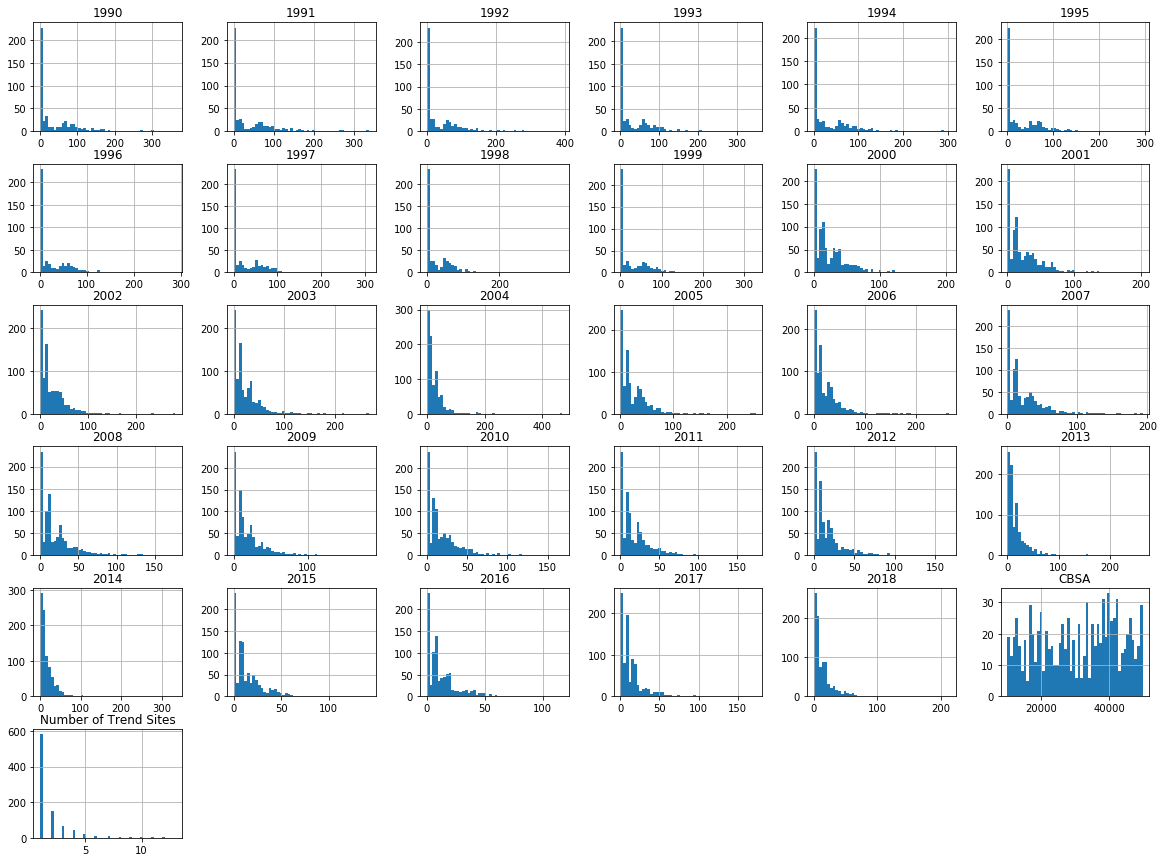

In [7]:
reader.hist(bins=50, figsize=(20,15))
plt.show()

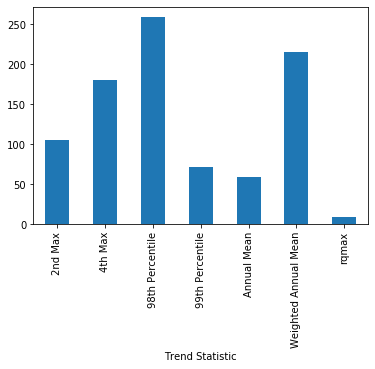

In [8]:
reader.groupby('Trend Statistic').size().plot.bar()
plt.show()

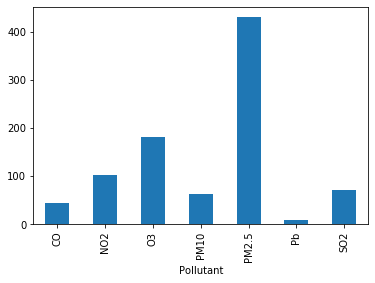

In [9]:
reader.groupby('Pollutant').size().plot.bar()
plt.show()

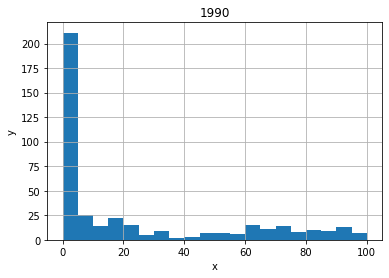

In [10]:
year_histogram = reader.hist(column='1990', bins=20, range=[0, 100])
for ax in year_histogram.flatten():
    ax.set_xlabel("x")
    ax.set_ylabel("y")
plt.show()

In [11]:
pol = reader.groupby('Pollutant')

In [12]:
pol.describe()

CBSA                                                         \
           count          mean           std      min      25%      50%   
Pollutant                                                                 
CO          43.0  31513.488372  11925.945881  10420.0  21240.0  33460.0   
NO2        103.0  32668.155340  11838.237626  10740.0  21500.0  36420.0   
O3         181.0  31884.806630  11783.113227  10420.0  21660.0  33460.0   
PM10        62.0  32316.129032  11203.353619  10740.0  23550.0  33220.0   
PM2.5      430.0  29510.372093  11344.355131  10100.0  19680.0  28900.0   
Pb           9.0  32115.555556   9232.961485  16980.0  26900.0  35620.0   
SO2         72.0  31575.833333  12089.814098  10420.0  19680.0  34880.0   

                            Number of Trend Sites            ...    2017  \
               75%      max                 count      mean  ...     75%   
Pollutant                                                    ...           
CO         40880.0  49620.0                  43.0  1.697674  ...   1.500   
NO2        41800.0  49700.0                 103.0  1.708738  ...  37.000   
O3         41860.0  49700.0                 181.0  2.209945  ...   0.069   
PM10       40810.0  49660.0                  62.0  1.838710  ...  64.475   
PM2.5      39640.0  49700.0                 430.0  1.827907  ...  18.000   
Pb         39740.0  41180.0                   9.0  1.666667  ...   0.020   
SO2        40970.0  49620.0                  72.0  1.527778  ...  18.000   

                     2018                                                \
               max  count       mean        std     min     25%     50%   
Pollutant                                                                 
CO           3.500   43.0   1.539535   0.719834   0.500   1.000   1.400   
NO2         56.000  103.0  21.495146  16.826609   2.000   7.000  13.000   
O3           0.099  181.0   0.067094   0.006906   0.046   0.063   0.066   
PM10       173.000   62.0  58.495161  41.660594  20.000  33.000  47.000   
PM2.5      111.000  430.0  15.771163  14.599732   3.000   7.800  12.500   
Pb           0.030    9.0   0.015556   0.021279   0.000   0.010   0.010   
SO2         70.000   72.0  13.444444  14.467924   2.000   4.000   8.000   

                            
              75%      max  
Pollutant                   
CO          1.850    3.500  
NO2        36.500   58.000  
O3          0.071    0.097  
PM10       61.650  213.400  
PM2.5      19.000  146.000  
Pb          0.010    0.070  
SO2        16.250   67.000  

[7 rows x 248 columns]

In [13]:
pol.first()

,CBSA,Core Based Statistical Area,Trend Statistic,Number of Trend Sites,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Pollutant,,,,,,,,,,,,,,,,,,,,,
CO,10420,"Akron, OH",2nd Max,1,5.70,3.300,4.100,3.100,5.300,3.300,...,1.800,1.400,1.000,1.100,0.800,0.80,1.000,1.10,0.900,1.800
NO2,10740,"Atlanta-Sandy Springs-Roswell, GA",Annual Mean,1,18.00,2.000,21.000,24.000,23.000,18.000,...,12.000,12.000,13.000,14.000,12.000,12.00,11.000,10.00,10.000,10.000
O3,10420,"Albany-Schenectady-Troy, NY",4th Max,2,0.09,0.101,0.087,0.093,0.086,0.092,...,0.067,0.074,0.073,0.072,0.059,0.06,0.065,0.06,0.066,0.068
PM10,10740,"Boulder, CO",2nd Max,1,43.00,45.000,37.000,58.000,41.000,46.000,...,35.000,24.000,129.000,95.000,92.000,106.00,44.000,63.00,46.000,60.000
PM2.5,10100,"Aberdeen, SD",Weighted Annual Mean,1,NaN,NaN,NaN,NaN,NaN,NaN,...,8.100,8.700,7.100,7.500,7.300,6.20,6.200,5.40,5.800,6.600
Pb,16980,"Reading, PA",rqmax,2,0.06,0.060,0.070,0.060,0.070,0.070,...,0.030,0.050,0.040,0.050,0.040,0.04,0.030,0.02,0.020,0.010
SO2,10420,"Billings, MT",99th Percentile,1,161.00,183.000,181.000,209.000,132.000,123.000,...,31.000,27.000,24.000,22.000,23.000,21.00,14.000,8.00,3.000,6.000


In [14]:
CO = pol.get_group('CO')

In [15]:
CO

,CBSA,Core Based Statistical Area,Trend Statistic,Number of Trend Sites,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,10420,"Akron, OH",2nd Max,1,5.7,3.3,4.1,3.1,5.3,3.3,...,1.8,1.4,1.0,1.1,0.8,0.8,1.0,1.1,0.9,1.8
12,10740,"Albuquerque, NM",2nd Max,1,5.1,5.5,4.4,5.0,4.5,3.8,...,1.1,1.1,1.3,1.6,0.9,1.2,1.4,1.2,1.0,1.0
25,11260,"Anchorage, AK",2nd Max,1,9.7,8.4,10.8,9.7,8.6,7.4,...,4.4,3.8,3.6,4.3,3.1,2.5,2.8,3.0,3.5,2.7
63,12940,"Baton Rouge, LA",2nd Max,1,4.6,4.6,4.6,9.0,4.6,3.4,...,1.1,2.0,1.4,1.7,1.8,1.3,1.2,1.1,1.0,1.7
79,13820,"Birmingham-Hoover, AL",2nd Max,1,6.4,6.1,7.4,7.1,6.9,6.4,...,2.9,2.2,2.1,1.7,1.7,2.4,1.9,1.4,1.0,1.2
107,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2nd Max,1,3.5,3.8,6.1,4.4,4.2,3.1,...,1.1,1.3,1.4,1.1,1.3,1.3,1.5,0.9,1.0,0.7
137,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2nd Max,1,3.8,4.6,4.2,5.0,4.6,3.7,...,2.2,2.4,2.3,1.9,1.4,1.9,2.1,1.1,1.4,1.6
157,17460,"Cleveland-Elyria, OH",2nd Max,1,6.6,6.6,6.6,4.2,7.7,6.3,...,6.6,3.5,3.1,4.6,4.6,3.7,2.9,3.9,3.3,3.1
172,18140,"Columbus, OH",2nd Max,1,4.8,6.5,5.8,5.3,4.1,4.9,...,1.5,1.7,1.5,1.6,1.0,1.3,1.5,1.8,1.6,1.2
207,19740,"Denver-Aurora-Lakewood, CO",2nd Max,2,9.3,8.2,10.8,7.7,7.3,7.3,...,2.1,2.1,1.7,1.7,2.3,1.9,1.9,1.6,1.4,2.1


In [16]:
co1= CO.drop(["Trend Statistic","CBSA","Number of Trend Sites"],axis = 1)
co1

,Core Based Statistical Area,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,"Akron, OH",5.7,3.3,4.1,3.1,5.3,3.3,3.4,3.2,2.6,...,1.8,1.4,1.0,1.1,0.8,0.8,1.0,1.1,0.9,1.8
12,"Albuquerque, NM",5.1,5.5,4.4,5.0,4.5,3.8,4.1,3.5,3.7,...,1.1,1.1,1.3,1.6,0.9,1.2,1.4,1.2,1.0,1.0
25,"Anchorage, AK",9.7,8.4,10.8,9.7,8.6,7.4,8.7,7.1,8.4,...,4.4,3.8,3.6,4.3,3.1,2.5,2.8,3.0,3.5,2.7
63,"Baton Rouge, LA",4.6,4.6,4.6,9.0,4.6,3.4,4.7,5.4,3.9,...,1.1,2.0,1.4,1.7,1.8,1.3,1.2,1.1,1.0,1.7
79,"Birmingham-Hoover, AL",6.4,6.1,7.4,7.1,6.9,6.4,4.9,5.9,4.4,...,2.9,2.2,2.1,1.7,1.7,2.4,1.9,1.4,1.0,1.2
107,"Buffalo-Cheektowaga-Niagara Falls, NY",3.5,3.8,6.1,4.4,4.2,3.1,3.7,3.3,3.1,...,1.1,1.3,1.4,1.1,1.3,1.3,1.5,0.9,1.0,0.7
137,"Chicago-Naperville-Elgin, IL-IN-WI",3.8,4.6,4.2,5.0,4.6,3.7,2.8,3.8,3.2,...,2.2,2.4,2.3,1.9,1.4,1.9,2.1,1.1,1.4,1.6
157,"Cleveland-Elyria, OH",6.6,6.6,6.6,4.2,7.7,6.3,9.4,6.1,6.4,...,6.6,3.5,3.1,4.6,4.6,3.7,2.9,3.9,3.3,3.1
172,"Columbus, OH",4.8,6.5,5.8,5.3,4.1,4.9,2.7,2.9,3.7,...,1.5,1.7,1.5,1.6,1.0,1.3,1.5,1.8,1.6,1.2
207,"Denver-Aurora-Lakewood, CO",9.3,8.2,10.8,7.7,7.3,7.3,5.6,4.9,4.1,...,2.1,2.1,1.7,1.7,2.3,1.9,1.9,1.6,1.4,2.1


In [17]:
co2 = co1.drop([12,25,63,79,107,137,207,216,271,280,296,334,351,360,369,431,458,465,483,505,524,551,586,593,612,624,641,652,675,680,703,716,727,749,806,819,826,847,884],axis = 0)
co2

,Core Based Statistical Area,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,"Akron, OH",5.7,3.3,4.1,3.1,5.3,3.3,3.4,3.2,2.6,...,1.8,1.4,1.0,1.1,0.8,0.8,1.0,1.1,0.9,1.8
157,"Cleveland-Elyria, OH",6.6,6.6,6.6,4.2,7.7,6.3,9.4,6.1,6.4,...,6.6,3.5,3.1,4.6,4.6,3.7,2.9,3.9,3.3,3.1
172,"Columbus, OH",4.8,6.5,5.8,5.3,4.1,4.9,2.7,2.9,3.7,...,1.5,1.7,1.5,1.6,1.0,1.3,1.5,1.8,1.6,1.2
856,"Weirton-Steubenville, WV-OH",6.8,6.8,6.8,8.3,9.6,6.0,6.2,8.8,13.2,...,1.0,0.8,0.9,0.7,0.6,0.7,0.7,0.5,0.5,0.5


In [18]:
co3 = co2.set_index('Core Based Statistical Area').T
co3

Core Based Statistical Area,"Akron, OH","Cleveland-Elyria, OH","Columbus, OH","Weirton-Steubenville, WV-OH"
1990,5.7,6.6,4.8,6.8
1991,3.3,6.6,6.5,6.8
1992,4.1,6.6,5.8,6.8
1993,3.1,4.2,5.3,8.3
1994,5.3,7.7,4.1,9.6
1995,3.3,6.3,4.9,6.0
1996,3.4,9.4,2.7,6.2
1997,3.2,6.1,2.9,8.8
1998,2.6,6.4,3.7,13.2
1999,2.5,3.9,2.5,4.3


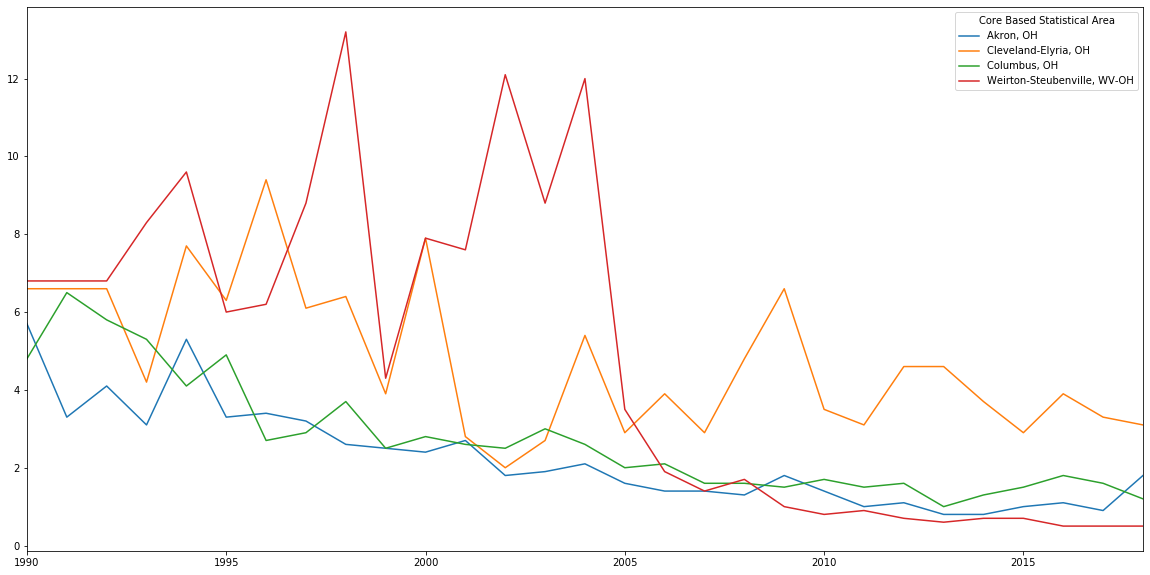

In [19]:
co3.plot.line(figsize=(20,10))

In [20]:
from sas7bdat import SAS7BDAT

In [21]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_column', 200)
pd.set_option('precision', 2)

reader1 = pd.read_sas('C:\\Users\\Lenovo\\Desktop\\Lung cancer data\\Lung\\lung_data_feb16_d080516.sas7bdat', format= None, index=None, encoding=None, chunksize=None, iterator=False)
print(reader1.describe())

print(  "\n\n" , reader1.columns  )

       dcf_dthl     f_dthl  nlst_flag  reasfolll  reassympl  reassurvl  reasothl    hasdel0    hasdel1    hasdel2    hasdel3  num_cancl  confirmed_lung  cstatusl_cat  intstatl_cat   fin_smcl  lung_stage  lung_stage_t  lung_stage_n  lung_stage_m  lung_clinstage  lung_clinstage_t  lung_clinstage_n  lung_clinstage_m  lung_pathstage  lung_pathstage_t  lung_pathstage_n  lung_pathstage_m  lung_grade  lung_histtype  lung_histtype_cat  lung_cancer_type  lung_is_carcinoid  lung_carcinoid_summstage  biopllink0  biopllink1  biopllink2  biopllink3  lung_mra_stat0  lung_mra_stat1  lung_mra_stat2  lung_mra_stat3  xry_result0  xry_result1  xry_result2  xry_result3  curative_pneuml  curative_wsll  curative_chemol  curative_radl  neoadjuvantl  primary_trtl_NSC  primary_trtl_small  xry_prot  has_xry_img_0  has_xry_img_1  has_xry_img_2  has_xry_img_3  link_timing_0  link_timing_1  link_timing_2  link_timing_3  has_unattrib  lung_exitstat  lung_exitage  lung_is_first_dx  candxdaysl  lung_exitdays  \
count

In [22]:
reader1.head()

,dcf_dthl,f_dthl,nlst_flag,reasfolll,reassympl,reassurvl,reasothl,hasdel0,hasdel1,hasdel2,hasdel3,num_cancl,confirmed_lung,cstatusl_cat,intstatl_cat,fin_smcl,lung_stage,lung_stage_t,lung_stage_n,lung_stage_m,lung_clinstage,lung_clinstage_t,lung_clinstage_n,lung_clinstage_m,lung_pathstage,lung_pathstage_t,lung_pathstage_n,lung_pathstage_m,lung_grade,lung_histtype,lung_histtype_cat,lung_cancer_type,lung_is_carcinoid,lung_carcinoid_summstage,biopllink0,biopllink1,biopllink2,biopllink3,lung_mra_stat0,lung_mra_stat1,lung_mra_stat2,lung_mra_stat3,xry_result0,xry_result1,xry_result2,xry_result3,curative_pneuml,curative_wsll,curative_chemol,curative_radl,neoadjuvantl,primary_trtl_NSC,primary_trtl_small,xry_prot,has_xry_img_0,has_xry_img_1,has_xry_img_2,has_xry_img_3,link_timing_0,link_timing_1,link_timing_2,link_timing_3,has_unattrib,lung_exitstat,lung_exitage,lung_is_first_dx,plco_id,build,candxdaysl,lung_exitdays,primary_trtl_NSC_days,primary_trtl_small_days,xry_days0,xry_days1,xry_days2,xry_days3,dcf_unddeath,dcf_unddeath_ccode,dcf_codeath_cat,dcf_cancersite,is_dead,dth_cat,f_unddeath,f_unddeath_ccode,f_codeath_cat,f_cancersite,mortality_exitstat,mortality_exitage,dth_days,mortality_exitdays,educat,marital,occupat,pipe,cigar,sisters,brothers,asp,ibup,fmenstr,...,endometriosis,uterine_fib,xray_history,bq_adminm,lmenstr,trypreg,prega,pregc,stillb,livec,fchilda,hystera,asppd,ibuppd,bcontra,bcontrt,curhorm,thorm,urinatea,enlprosa,infprosa,vasecta,hyperten_f,hearta_f,stroke_f,emphys_f,bronchit_f,diabetes_f,polyps_f,arthrit_f,osteopor_f,divertic_f,gallblad_f,bq_returned,bq_age,race7,hispanic_f,surg_biopsy,surg_resection,surg_prostatectomy,surg_age,surg_any,preg_f,hyster_f,ovariesr_f,enlpros_f,infpros_f,prosprob_f,urinate_f,vasect_f,bcontr_f,horm_f,horm_stat,smoked_f,smokea_f,rsmoker_f,ssmokea_f,cigpd_f,filtered_f,cig_stat,cig_stop,cig_years,pack_years,bmi_20,bmi_50,bmi_curr,bmi_curc,weight_f,weight20_f,weight50_f,height_f,menstrs_stat_type,post_menopausal,state,colon_comorbidity,liver_comorbidity,fh_cancer,lung_fh,lung_fh_cnt,lung_fh_age,bq_compdays,fstcan_exitstat,fstcan_exitage,inci_last_contact_stat,bq_cohort_entryage,trial_ph_any,trial_ph_lung,fstcan_exitdays,inci_last_contact_days,bq_cohort_entrydays,center,rndyear,arm,sex,age,agelevel,dual,has_nrf,nrf_reason,nrf_days
0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,14.0,80.0,0.0,b'A-000899-7',b'09t13/feb16/08.05.16',NaN,4747.0,NaN,NaN,65.0,396.0,707.0,1079.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,80.0,NaN,4747.0,2.0,3.0,4.0,0.0,0.0,3.0,3.0,1.0,0.0,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,26.44,29.09,25.78,3.0,195.0,200.0,220.0,73.0,NaN,NaN,17.0,0.0,0.0,1.0,9.0,0.0,NaN,-25.0,14.0,80.0,4.0,67.0,0.0,0.0,4747.0,4747.0,0.0,4.0,1996.0,1.0,1.0,67.0,2.0,1.0,0.0,NaN,NaN
1,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,13.0,72.0,0.0,b'A-000989-6',b'09t13/feb16/08.05.16',NaN,3816.0,NaN,NaN,26.0,344.0,702.0,1079.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,72.0,NaN,3816.0,7.0,1.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,62.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,1.0,21.0,0.0,29.0,5.0,1.0,2.0,33.0,8.0,24.0,22.36,27.95,25.72,3.0,184.0,160.0,200.0,71.0,NaN,NaN,36.0,0.0,0.0,1.0,0.0,0.0,NaN,-7.0,13.0,72.0,3.0,62.

In [23]:
city12 = reader1.groupby('state')
city12

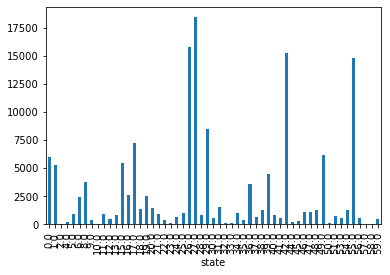

In [24]:
reader1.groupby('state').size().plot.bar()
plt.show()

In [25]:
city12.describe()

dcf_dthl                                        f_dthl                                          nlst_flag                                       reasfolll                                        reassympl                                        reassurvl                                       reasothl                                         hasdel0                                       hasdel1                                           hasdel2                                       hasdel3                                          num_cancl                                          confirmed_lung                       ... fstcan_exitdays                          inci_last_contact_days                                                             bq_cohort_entrydays                                                 center                                             rndyear                                                              arm                                           sex        \
         count  mean   std  min  25%  50%  75%  max    count      mean   std  min  25%  50%  75%  max     count  mean   std  min  25%  50%   75%  max     count  mean   std  min   25%  50%   75%  max     count  mean   std  min   25%  50%   75%  max     count  mean   std  min  25%  50%   75%  max    count  mean   std  min   25%  50%   75%  max    count  mean   std  min  25%  50%  75%  max    count      mean   std  min  25%  50%  75%  max    count  mean   std  min  25%  50%  75%  max    count      mean   std  min  25%  50%  75%  max     count      mean   std  min  25%  50%  75%  max          count      mean   std  min  ...             25%     50%      75%     max                  count     mean      std     min      25%     50%      75%     max               count   mean    std  min   25%   50%    75%     max    count  mean   std  min    25%   50%    75%   max    count     mean   std     min      25%     50%     75%     max    count  mean   std  min  25%  50%  75%  max    count  mean   
state                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ...                                                                                                                                                                                                                                                                                                                                                                                   
0.0      679.0  0.09  0.29  0.0  0.0  0.0  0.0  1.0   5997.0  1.07e-02  0.10  0.0  0.0  0.0  0.0  1.0    5915.0  0.15  0.36  0.0  0.0  0.0  0.00  1.0      95.0  0.06  0.24  0.0  0.00  0.0  0.00  1.0      95.0  0.68  0.47  0.0  0.00  1.0  1.00  1.0      13.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0     95.0  0.31  0.46  0.0  0.00  0.0  1.00  1.0   5997.0  0.03  0.18  0.0  0.0  0.0  0.0  1.0   5997.0  3.42e-02  0.18  0.0  0.0  0.0  0.0  1.0   5997.0  0.03  0.17  0.0  0.0  0.0  0.0  1.0   5997.0  1.70e-02  0.13  0.0  0.0  0.0  0.0  1.0    5997.0  1.58e-02  0.12  0.0  0.0  0.0  0.0  1.0         5997.0  1.53e-02  0.12  0.0  ...         3393.00  4194.0  4719.00  4748.0                 5997.0  3977.77  1074.86     0.0  3821.00  4398.0  4721.00  4748.0              5997.0  11.82  35.85  0.0   0.0   0.0   9.00   755.0   5997.0  4.54  2.61  1.0   3.00   4.0   6.00  11.0   5997.0  1996.88  1.89  1993.0  1995.00  1997.0  1998.0  2001.0   5997.0  1.50  0.50  1.0  1.0  1.0  2.0  2.0   5997.0  1.50   
1.0      8

In [26]:
city12.first()

,dcf_dthl,f_dthl,nlst_flag,reasfolll,reassympl,reassurvl,reasothl,hasdel0,hasdel1,hasdel2,hasdel3,num_cancl,confirmed_lung,cstatusl_cat,intstatl_cat,fin_smcl,lung_stage,lung_stage_t,lung_stage_n,lung_stage_m,lung_clinstage,lung_clinstage_t,lung_clinstage_n,lung_clinstage_m,lung_pathstage,lung_pathstage_t,lung_pathstage_n,lung_pathstage_m,lung_grade,lung_histtype,lung_histtype_cat,lung_cancer_type,lung_is_carcinoid,lung_carcinoid_summstage,biopllink0,biopllink1,biopllink2,biopllink3,lung_mra_stat0,lung_mra_stat1,lung_mra_stat2,lung_mra_stat3,xry_result0,xry_result1,xry_result2,xry_result3,curative_pneuml,curative_wsll,curative_chemol,curative_radl,neoadjuvantl,primary_trtl_NSC,primary_trtl_small,xry_prot,has_xry_img_0,has_xry_img_1,has_xry_img_2,has_xry_img_3,link_timing_0,link_timing_1,link_timing_2,link_timing_3,has_unattrib,lung_exitstat,lung_exitage,lung_is_first_dx,plco_id,build,candxdaysl,lung_exitdays,primary_trtl_NSC_days,primary_trtl_small_days,xry_days0,xry_days1,xry_days2,xry_days3,dcf_unddeath,dcf_unddeath_ccode,dcf_codeath_cat,dcf_cancersite,is_dead,dth_cat,f_unddeath,f_unddeath_ccode,f_codeath_cat,f_cancersite,mortality_exitstat,mortality_exitage,dth_days,mortality_exitdays,educat,marital,occupat,pipe,cigar,sisters,brothers,asp,ibup,fmenstr,...,benign_ovcyst,endometriosis,uterine_fib,xray_history,bq_adminm,lmenstr,trypreg,prega,pregc,stillb,livec,fchilda,hystera,asppd,ibuppd,bcontra,bcontrt,curhorm,thorm,urinatea,enlprosa,infprosa,vasecta,hyperten_f,hearta_f,stroke_f,emphys_f,bronchit_f,diabetes_f,polyps_f,arthrit_f,osteopor_f,divertic_f,gallblad_f,bq_returned,bq_age,race7,hispanic_f,surg_biopsy,surg_resection,surg_prostatectomy,surg_age,surg_any,preg_f,hyster_f,ovariesr_f,enlpros_f,infpros_f,prosprob_f,urinate_f,vasect_f,bcontr_f,horm_f,horm_stat,smoked_f,smokea_f,rsmoker_f,ssmokea_f,cigpd_f,filtered_f,cig_stat,cig_stop,cig_years,pack_years,bmi_20,bmi_50,bmi_curr,bmi_curc,weight_f,weight20_f,weight50_f,height_f,menstrs_stat_type,post_menopausal,colon_comorbidity,liver_comorbidity,fh_cancer,lung_fh,lung_fh_cnt,lung_fh_age,bq_compdays,fstcan_exitstat,fstcan_exitage,inci_last_contact_stat,bq_cohort_entryage,trial_ph_any,trial_ph_lung,fstcan_exitdays,inci_last_contact_days,bq_cohort_entrydays,center,rndyear,arm,sex,age,agelevel,dual,has_nrf,nrf_reason,nrf_days
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,1.0,3.0,9.0,7.0,1.0,3.0,99.0,99.0,99.0,99.0,3.0,7.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,75.0,0.0,b'A-002699-9',b'09t13/feb16/08.05.16',531.0,4733.0,605.0,2408.0,90.0,405.0,792.0,1121.0,b'4273X',99.0,400.0,99.0,0.0,0.0,b'4273X',99.0,400.0,99.0,2.0,75.0,1447.0,4733.0,3.0,1.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,2.0,...,0.0,0.0,0.0,2.0,1.0,5.0,0.0,3.0,4.0,0.0,5.0,3.0,5.0,0.0,0.0,2.0,2.0,1.0,2.0,4.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,62.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0,17.0,0.0,36.0,0.0,1.0,0.0,21.0,0.0,0.0,21.87,28.95,31.52,4.0,142.0,110.0,134.0,74.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,73.0,-37.0,17.0,75.0,1.0,62.0,0.0,0.0,4733.0,4733.0,0.0,4.0,1994.0,2.0,2.0,62.0,1.0,0.0,0.0,3.0,404.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,5.0,2.0,7.0,6.0,4.0,2.0,8.0,1.0,5.0,2.0,3.0,7.0,2.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,13.0,72.0,0.0,b'A-004877-9',b'09t13/feb16/08.05.16',2893.0,4200.0,2913.0,573.0,0.0,332.0,710.0,1065.0,b'4151X',99.0,400.0,99.0,0.0,0.0,b'4151X',99.0,400.0,99.0,2.0,72.0,1146.0,4200.0,3.0,1.0,1.0,0.0,0.0,6.0,3.0,0.0,1.0,3.0,...,1.0,1.0,0.0,0.0,1.0,2.0,1.0,6.0,1.0,0.0,1.0,6.0,2.0,6.0,2.0,1.0,2.0,1.0,1.0,4

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>